## Research question/interests

**How do regions that people are located in the US affect individuals' BMI and medical expenses?**

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1
**Load data**

In [6]:
df = pd.read_csv("../../data/raw/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Clean data**

In [9]:
#remove column and rename
df0=df.drop(columns='smoker')
df1=df0.rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
df1

,Age,Sex,BMI,Children,Region,Medical expenses
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350
1336,21,female,25.800,0,southwest,2007.94500


**Process data/Wrangling data**

In [10]:
#in order to see which group of age of each individual belong to, I have build the function to separate according to age.
def typeofage(age):
    if age <= 19:
        return 'adolescent'
    elif 20 <= age <= 35:
        return 'young adult'
    elif 36 <= age <= 50:
        return 'middle-aged adult'
    elif 51 <= age <= 65:
        return 'older adult'  
    else:
        return 'elderly'

df1['Group of age'] = df1['Age'].apply(lambda x: typeofage(x))

df1

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,19,female,27.900,0,southwest,16884.92400,adolescent
1,18,male,33.770,1,southeast,1725.55230,adolescent
2,28,male,33.000,3,southeast,4449.46200,young adult
3,33,male,22.705,0,northwest,21984.47061,young adult
4,32,male,28.880,0,northwest,3866.85520,young adult
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,middle-aged adult
1334,18,female,31.920,0,northeast,2205.98080,adolescent
1335,18,female,36.850,0,southeast,1629.83350,adolescent
1336,21,female,25.800,0,southwest,2007.94500,young adult


In [24]:
#since I only want to separate by using the group of age, and I would like to explore more about females, so I only keep the females.
#This is the dataframe for female teens with various bmi, number of children with diffrent regions and nedical expenses.
dfx=df1.loc[df1['Group of age']=='adolescent']
dfy=dfx.loc[df1['Sex']=='female']

df_adol=dfy.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_adol

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,18,female,33.155,0,northeast,2207.69745,adolescent
1,18,female,27.280,3,southeast,18223.45120,adolescent
2,18,female,39.820,0,southeast,1633.96180,adolescent
3,18,female,36.850,0,southeast,1629.83350,adolescent
4,18,female,39.160,0,southeast,1633.04440,adolescent
...,...,...,...,...,...,...,...
61,19,female,24.700,0,southwest,1737.37600,adolescent
62,19,female,36.575,0,northwest,2136.88225,adolescent
63,19,female,35.150,0,northwest,2134.90150,adolescent
64,19,female,24.510,1,northwest,2709.11190,adolescent


In [19]:
#This is the dataframe for young female adults with various bmi, number of children with diffrent regions and nedical expenses.
df2=df1.loc[df1['Group of age']=='young adult']
df3=df2.loc[df1['Sex']=='female']


df_young=df3.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,20,female,28.785,0,northeast,2457.21115,young adult
1,20,female,26.840,1,southeast,17085.26760,young adult
2,20,female,31.460,0,southeast,1877.92940,young adult
3,20,female,31.790,2,southeast,3056.38810,young adult
4,20,female,33.300,0,southwest,1880.48700,young adult
...,...,...,...,...,...,...,...
207,35,female,34.800,1,southwest,5246.04700,young adult
208,35,female,35.860,2,southeast,5836.52040,young adult
209,35,female,27.700,3,southwest,6414.17800,young adult
210,35,female,38.095,2,northeast,24915.04626,young adult


In [21]:
#This is the dataframe for middle-aged female adults with various bmi, number of children with diffrent regions and nedical expenses.
dfa=df1.loc[df1['Group of age']=='middle-aged adult']
dfb=dfa.loc[df1['Sex']=='female']

df_mid=dfb.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,36,female,22.600,2,southwest,18608.26200,middle-aged adult
1,36,female,29.040,4,southeast,7243.81360,middle-aged adult
2,36,female,25.840,0,northwest,5266.36560,middle-aged adult
3,36,female,26.885,0,northwest,5267.81815,middle-aged adult
4,36,female,22.135,3,northeast,7228.21565,middle-aged adult
...,...,...,...,...,...,...,...
198,50,female,28.160,3,southeast,10702.64240,middle-aged adult
199,50,female,26.220,2,northwest,10493.94580,middle-aged adult
200,50,female,46.090,1,southeast,9549.56510,middle-aged adult
201,50,female,44.745,0,northeast,9541.69555,middle-aged adult


In [23]:
#This is the dataframe for older female adults with various bmi, number of children with diffrent regions and nedical expenses.
dfi=df1.loc[df1['Group of age']=='older adult']
dfj=dfi.loc[df1['Sex']=='female']

df_older=dfj.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_older

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,51,female,21.560,1,southeast,9855.13140,older adult
1,51,female,37.730,1,southeast,9877.60770,older adult
2,51,female,36.385,3,northwest,11436.73815,older adult
3,51,female,20.600,0,southwest,9264.79700,older adult
4,51,female,33.915,0,northeast,9866.30485,older adult
...,...,...,...,...,...,...,...
176,64,female,22.990,0,southeast,27037.91410,older adult
177,64,female,39.050,3,southeast,16085.12750,older adult
178,64,female,31.300,2,southwest,47291.05500,older adult
179,64,female,26.885,0,northwest,29330.98315,older adult


In [25]:
#This is the dataframe for female elderly with various bmi, number of children with diffrent regions and nedical expenses.
#It can be seen that there are no information in this part.
dfm=df1.loc[df1['Group of age']=='elderly']
dfn=dfm.loc[df1['Sex']=='female']

df_el=dfn.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_el

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age


## Task 2

In [64]:
import pandas as pd 

In [27]:
df_adol=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='adolescent']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_adol

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,18,female,33.155,0,northeast,2207.69745,adolescent
1,18,female,27.280,3,southeast,18223.45120,adolescent
2,18,female,39.820,0,southeast,1633.96180,adolescent
3,18,female,36.850,0,southeast,1629.83350,adolescent
4,18,female,39.160,0,southeast,1633.04440,adolescent
...,...,...,...,...,...,...,...
61,19,female,24.700,0,southwest,1737.37600,adolescent
62,19,female,36.575,0,northwest,2136.88225,adolescent
63,19,female,35.150,0,northwest,2134.90150,adolescent
64,19,female,24.510,1,northwest,2709.11190,adolescent


In [28]:
df_young=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='young adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,20,female,28.785,0,northeast,2457.21115,young adult
1,20,female,26.840,1,southeast,17085.26760,young adult
2,20,female,31.460,0,southeast,1877.92940,young adult
3,20,female,31.790,2,southeast,3056.38810,young adult
4,20,female,33.300,0,southwest,1880.48700,young adult
...,...,...,...,...,...,...,...
207,35,female,34.800,1,southwest,5246.04700,young adult
208,35,female,35.860,2,southeast,5836.52040,young adult
209,35,female,27.700,3,southwest,6414.17800,young adult
210,35,female,38.095,2,northeast,24915.04626,young adult


In [29]:
df_mid=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='middle-aged adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,36,female,22.600,2,southwest,18608.26200,middle-aged adult
1,36,female,29.040,4,southeast,7243.81360,middle-aged adult
2,36,female,25.840,0,northwest,5266.36560,middle-aged adult
3,36,female,26.885,0,northwest,5267.81815,middle-aged adult
4,36,female,22.135,3,northeast,7228.21565,middle-aged adult
...,...,...,...,...,...,...,...
198,50,female,28.160,3,southeast,10702.64240,middle-aged adult
199,50,female,26.220,2,northwest,10493.94580,middle-aged adult
200,50,female,46.090,1,southeast,9549.56510,middle-aged adult
201,50,female,44.745,0,northeast,9541.69555,middle-aged adult


In [45]:
df_older=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='older adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_older

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,51,female,21.560,1,southeast,9855.13140,older adult
1,51,female,37.730,1,southeast,9877.60770,older adult
2,51,female,36.385,3,northwest,11436.73815,older adult
3,51,female,20.600,0,southwest,9264.79700,older adult
4,51,female,33.915,0,northeast,9866.30485,older adult
...,...,...,...,...,...,...,...
176,64,female,22.990,0,southeast,27037.91410,older adult
177,64,female,39.050,3,southeast,16085.12750,older adult
178,64,female,31.300,2,southwest,47291.05500,older adult
179,64,female,26.885,0,northwest,29330.98315,older adult


In [31]:
df_el=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='elderly']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_el

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age


In [68]:
def load(url_or_path_to_csv_file):
    df_adol=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='adolescent']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
    df_young=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='young adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )

    df_mid=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='middle-aged adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )

    df_older=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='older adult']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
    
    df_el=(pd.read_csv("../../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Group_of_age']=='elderly']
        .loc[lambda x:x['Sex']=='female']
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )


    

    return df_adol,df_young , df_mid,df_older,df_el

In [69]:
load("../../data/raw/insurance.csv")

(    Age     Sex     BMI  Children     Region  Medical expenses Group_of_age
 0    18  female  33.155         0  northeast        2207.69745   adolescent
 1    18  female  27.280         3  southeast       18223.45120   adolescent
 2    18  female  39.820         0  southeast        1633.96180   adolescent
 3    18  female  36.850         0  southeast        1629.83350   adolescent
 4    18  female  39.160         0  southeast        1633.04440   adolescent
 ..  ...     ...     ...       ...        ...               ...          ...
 61   19  female  24.700         0  southwest        1737.37600   adolescent
 62   19  female  36.575         0  northwest        2136.88225   adolescent
 63   19  female  35.150         0  northwest        2134.90150   adolescent
 64   19  female  24.510         1  northwest        2709.11190   adolescent
 65   19  female  27.900         0  southwest       16884.92400   adolescent
 
 [66 rows x 7 columns],
      Age     Sex     BMI  Children     Region  Me

In [72]:
from project_functions3 import load # This is called a relative import
df = load('../../data/raw/insurance.csv')
df

ImportError: cannot import name 'load' from 'project_functions3' (/Users/phromphatsonphasutha-ekkasit/school/project/project-group-group10/analysis/ungraded/project_functions3.py)

## Task 3: Conduct your analysis to help answer your research question(s)

### Research Questions
**How do regions that people are located in the US affect individuals' BMI and medical expenses? What about when having children?**

In [73]:
df_adol

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,18,female,33.155,0,northeast,2207.69745,adolescent
1,18,female,27.280,3,southeast,18223.45120,adolescent
2,18,female,39.820,0,southeast,1633.96180,adolescent
3,18,female,36.850,0,southeast,1629.83350,adolescent
4,18,female,39.160,0,southeast,1633.04440,adolescent
...,...,...,...,...,...,...,...
61,19,female,24.700,0,southwest,1737.37600,adolescent
62,19,female,36.575,0,northwest,2136.88225,adolescent
63,19,female,35.150,0,northwest,2134.90150,adolescent
64,19,female,24.510,1,northwest,2709.11190,adolescent


Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Female Adolescents')

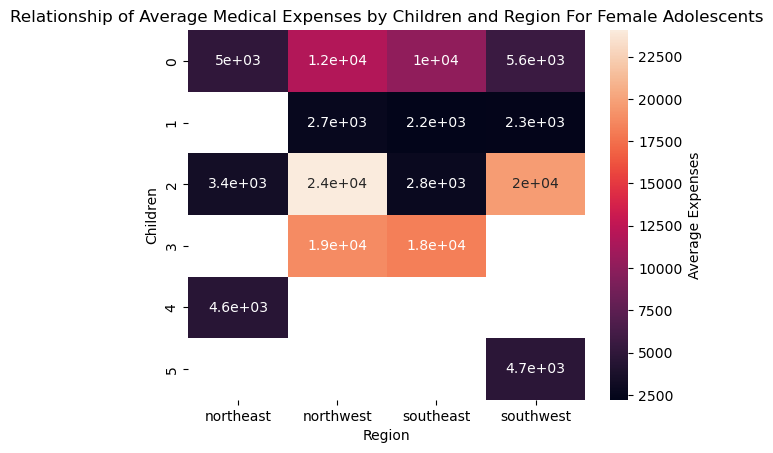

In [76]:
adol_g2 = df_adol.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(adol_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Female Adolescents')

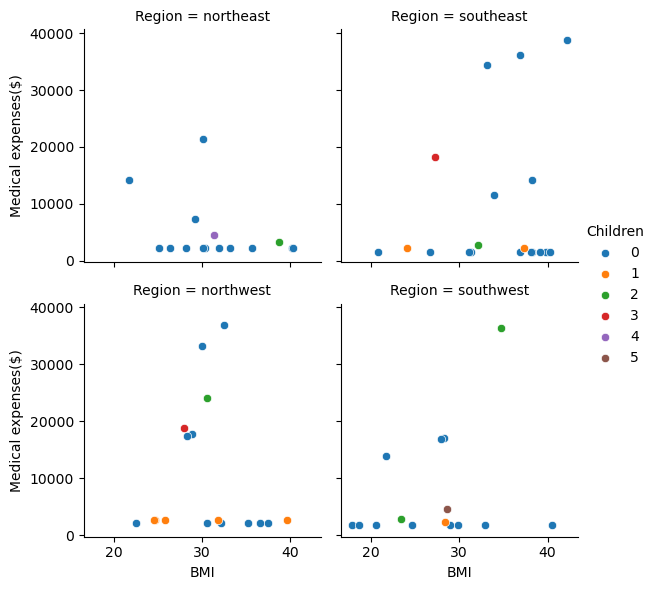

In [94]:
adol_g1 = sns.FacetGrid(data=df_adol, col='Region',col_wrap=2,hue='Children')
adol_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')
adol_g1.add_legend()

In [77]:
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,20,female,28.785,0,northeast,2457.21115,young adult
1,20,female,26.840,1,southeast,17085.26760,young adult
2,20,female,31.460,0,southeast,1877.92940,young adult
3,20,female,31.790,2,southeast,3056.38810,young adult
4,20,female,33.300,0,southwest,1880.48700,young adult
...,...,...,...,...,...,...,...
207,35,female,34.800,1,southwest,5246.04700,young adult
208,35,female,35.860,2,southeast,5836.52040,young adult
209,35,female,27.700,3,southwest,6414.17800,young adult
210,35,female,38.095,2,northeast,24915.04626,young adult


Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Young Female Adults')

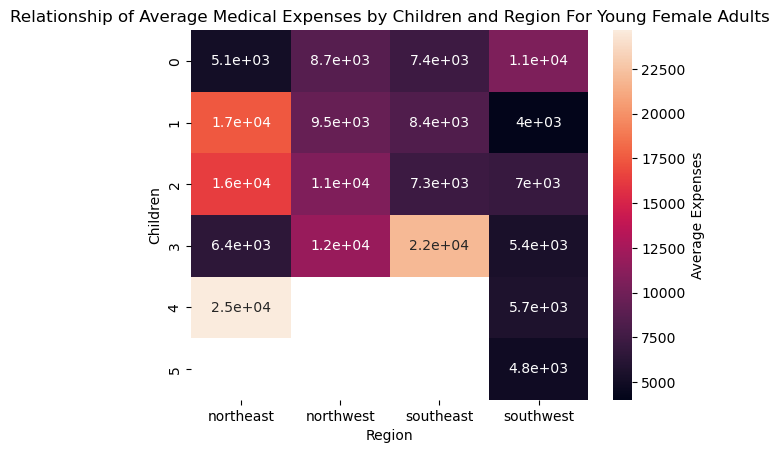

In [79]:
young_g2 = df_young.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(young_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Young Female Adults')

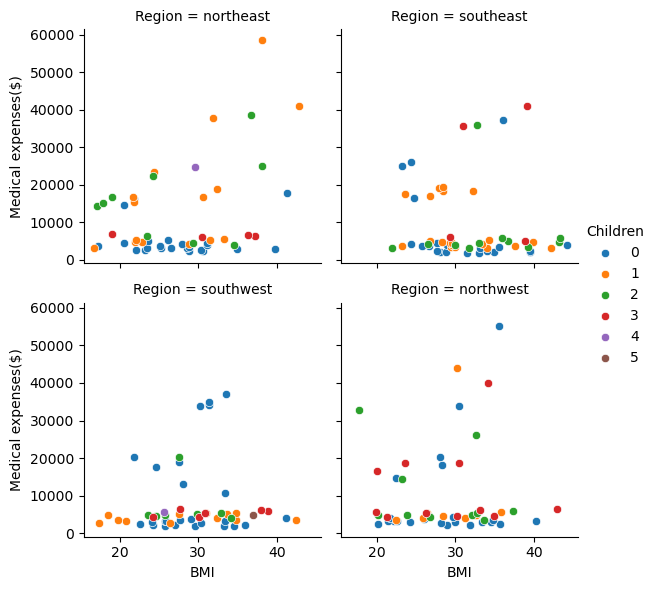

In [93]:
young_g1 = sns.FacetGrid(data=df_young, col='Region',col_wrap=2,hue='Children')
young_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')
young_g1.add_legend()

In [80]:
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,36,female,22.600,2,southwest,18608.26200,middle-aged adult
1,36,female,29.040,4,southeast,7243.81360,middle-aged adult
2,36,female,25.840,0,northwest,5266.36560,middle-aged adult
3,36,female,26.885,0,northwest,5267.81815,middle-aged adult
4,36,female,22.135,3,northeast,7228.21565,middle-aged adult
...,...,...,...,...,...,...,...
198,50,female,28.160,3,southeast,10702.64240,middle-aged adult
199,50,female,26.220,2,northwest,10493.94580,middle-aged adult
200,50,female,46.090,1,southeast,9549.56510,middle-aged adult
201,50,female,44.745,0,northeast,9541.69555,middle-aged adult


Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Middle-Aged Female Adults')

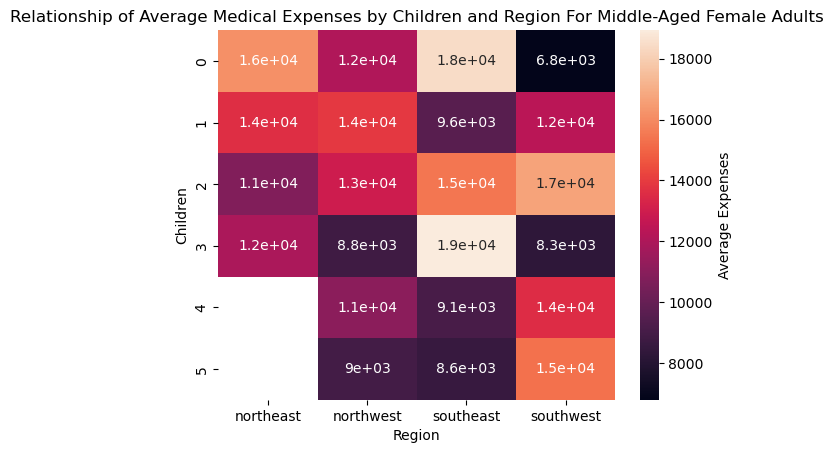

In [82]:
mid_g2 = df_mid.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(mid_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Middle-Aged Female Adults')

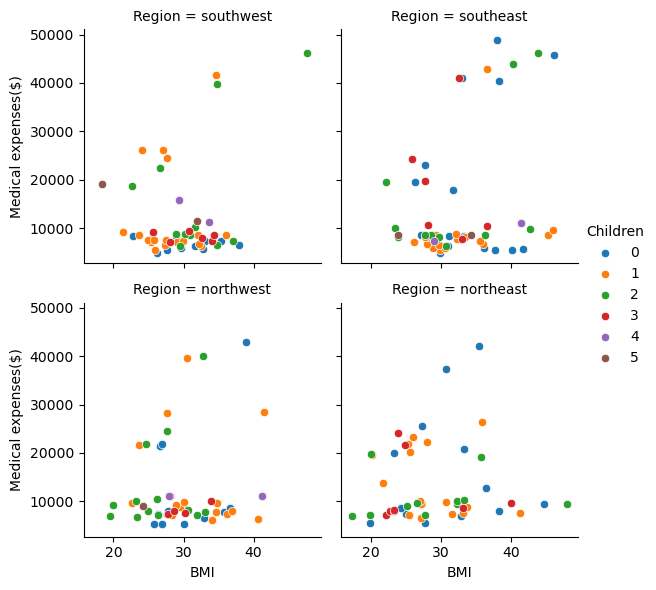

In [91]:
mid_g1 = sns.FacetGrid(data=df_mid, col='Region',col_wrap=2,hue='Children')
mid_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')
mid_g1.add_legend()

In [83]:
df_older

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,51,female,21.560,1,southeast,9855.13140,older adult
1,51,female,37.730,1,southeast,9877.60770,older adult
2,51,female,36.385,3,northwest,11436.73815,older adult
3,51,female,20.600,0,southwest,9264.79700,older adult
4,51,female,33.915,0,northeast,9866.30485,older adult
...,...,...,...,...,...,...,...
176,64,female,22.990,0,southeast,27037.91410,older adult
177,64,female,39.050,3,southeast,16085.12750,older adult
178,64,female,31.300,2,southwest,47291.05500,older adult
179,64,female,26.885,0,northwest,29330.98315,older adult


Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Older Female Adults')

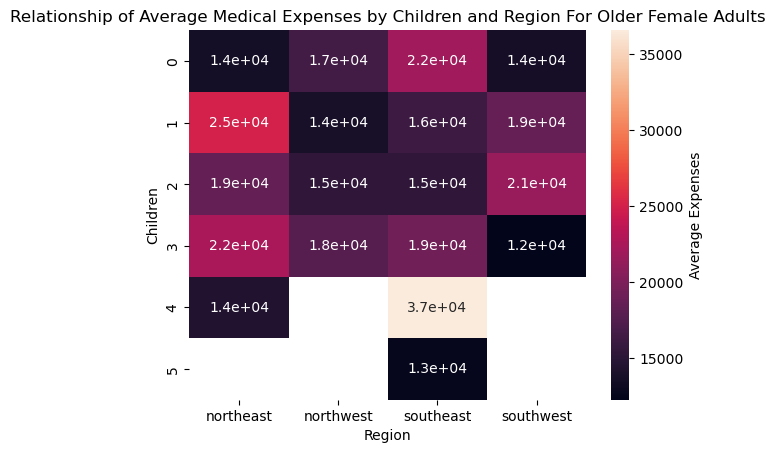

In [85]:
older_g2 = df_older.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(older_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Older Female Adults')

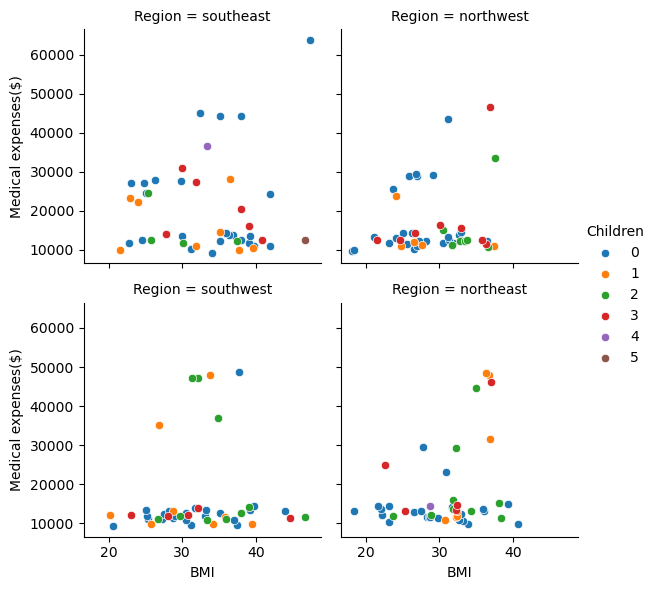

In [89]:
older_g1 = sns.FacetGrid(data=df_older, col='Region',col_wrap=2, hue='Children')
older_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')
older_g1.add_legend()

In [86]:
df_el

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
